In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

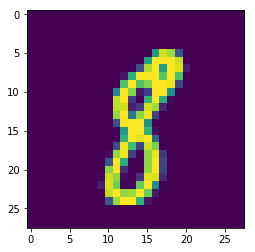

In [5]:
plt.imshow(X_train[300])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [9]:
y_train.shape


(60000, 10)

In [12]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 91s - loss: 0.1837 - acc: 0.9446 - val_loss: 0.0835 - val_acc: 0.9744
Epoch 2/5
 - 89s - loss: 0.0784 - acc: 0.9759 - val_loss: 0.0799 - val_acc: 0.9772
Epoch 3/5
 - 90s - loss: 0.0532 - acc: 0.9829 - val_loss: 0.0948 - val_acc: 0.9725
Epoch 4/5
 - 89s - loss: 0.0404 - acc: 0.9868 - val_loss: 0.0996 - val_acc: 0.9712
Epoch 5/5
 - 91s - loss: 0.0303 - acc: 0.9900 - val_loss: 0.0866 - val_acc: 0.9786


In [15]:
scores

[0.08663913231919287, 0.9786]